In [1]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

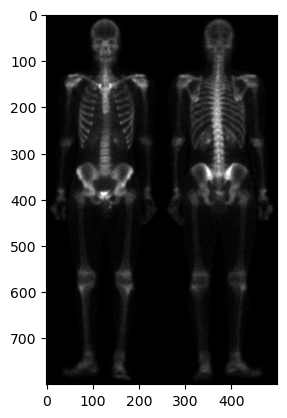

In [2]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0343(a)(skeleton_orig).tif")
img = np.asarray(img)
plt.imshow(img, cmap = 'gray')

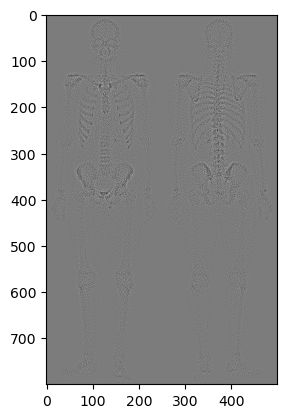

In [3]:
lap = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(lap, cmap = 'gray')

Text(0.5, 1.0, 'a+b')

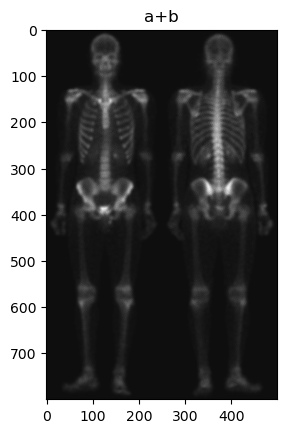

In [5]:
sharpened_image = img + lap
plt.imshow(sharpened_image, cmap = 'gray')
plt.title('a+b')

Text(0.5, 1.0, 'Sobel Gradient')

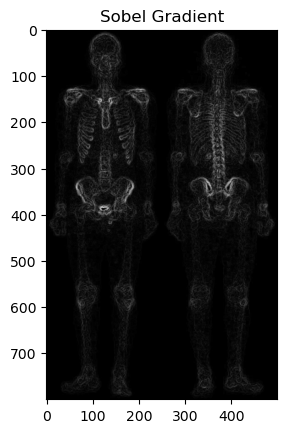

In [6]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
sobel_gradient = np.sqrt(sobel_x**2 + sobel_y**2)

plt.imshow(sobel_gradient, cmap = 'gray')
plt.title('Sobel Gradient')

Text(0.5, 1.0, 'Sobel Smoothed + Avg Filter')

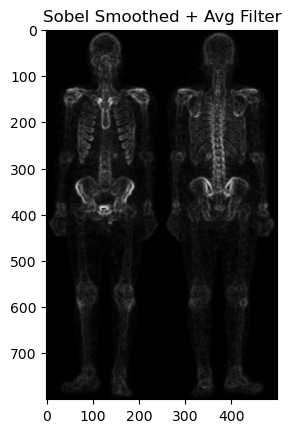

In [7]:
sobel_smoothed = cv2.GaussianBlur(sobel_gradient, (5, 5), 0)

plt.imshow(sobel_smoothed, cmap = 'gray')
plt.title('Sobel Smoothed + Avg Filter')

Text(0.5, 1.0, 'Mask Image (c * e)')

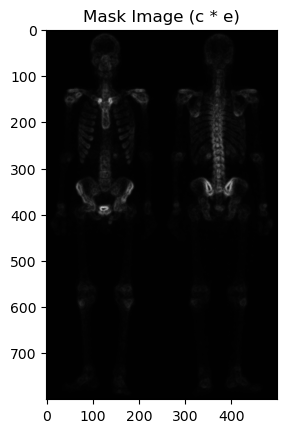

In [8]:
mask_image = sharpened_image * sobel_smoothed
plt.imshow(mask_image, cmap='gray')
plt.title('Mask Image (c * e)')

Text(0.5, 1.0, 'Sharpened Final (a + f)')

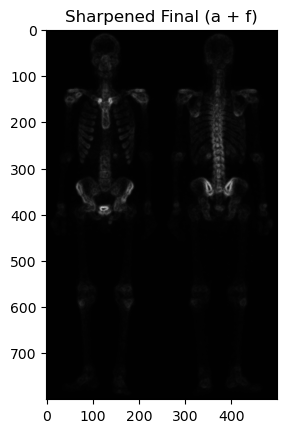

In [9]:
sharpened_final = img + mask_image

plt.imshow(sharpened_final, cmap = 'gray')
plt.title('Sharpened Final (a + f)')

C:\Users\mnv\AppData\Local\Temp\ipykernel_12604\1636507370.py:2: RuntimeWarning: invalid value encountered in power
  final_result = np.power(sharpened_final / 255.0, gamma) * 255.0


Text(0.5, 1.0, 'Power-law')

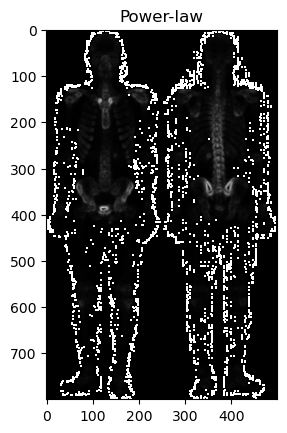

In [20]:
gamma = 0.95
final_result = np.power(sharpened_final / 255.0, gamma) * 255.0

plt.imshow(final_result, cmap = 'gray')
plt.title('Power-law')